In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Using TensorFlow backend.


In [ ]:
elliptical= cv2.imread("/content/PGC0000243.png")

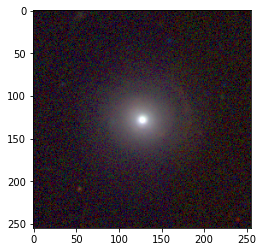

In [ ]:
plt.imshow(elliptical)

In [ ]:
elliptical.shape

(255, 255, 3)

In [ ]:
num_classes=3

In [ ]:
model1 = Sequential()
model1.add(Conv2D(3,5,5, activation='tanh', input_shape=elliptical.shape))

In [ ]:
def visualize_ell(model, elliptical):
    fig = plt.gcf()
    ell_batch = np.expand_dims(elliptical,axis=0)
    conv_ell = model.predict(ell_batch)
    conv_ell = np.squeeze(conv_ell, axis=0)
    print (conv_ell.shape)
    plt.imshow(conv_ell)
    fig.savefig('3_filter_1st_layer_visuals_ell.png')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(251, 251, 3)


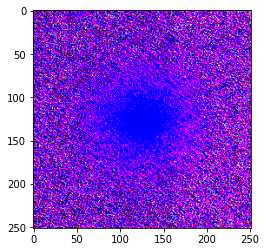

In [ ]:
visualize_ell(model1, elliptical)

In [ ]:
model2 = Sequential()
model2.add(Conv2D(1,5,5, activation='tanh', input_shape=elliptical.shape))
model2.add(MaxPooling2D(pool_size=(5,5)))

In [ ]:
def nice_galaxy_printer(model, elliptical):
    fig = plt.gcf()
    ell_batch = np.expand_dims(elliptical,axis=0)
    conv_ell2 = model.predict(ell_batch)

    conv_ell2 = np.squeeze(conv_ell2, axis=0)
    print (conv_ell2.shape)
    conv_ell2 = conv_ell2.reshape(conv_ell2.shape[:2])

    print (conv_ell2.shape)
    plt.imshow(conv_ell2)
    fig.savefig('1_filter_1st_layer_visuals_with_pooling_ell.png')

(50, 50, 1)
(50, 50)


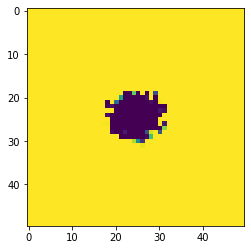

In [ ]:
nice_galaxy_printer(model2, elliptical)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(9, 9, 3)


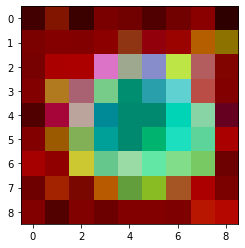

In [ ]:
model3 = Sequential()
model3.add(Conv2D(3,5,5, activation='tanh', input_shape=elliptical.shape))
model3.add(MaxPooling2D(pool_size=(5,5)))
model3.add(Conv2D(3,5,5, activation='tanh', input_shape=elliptical.shape))
model3.add(MaxPooling2D(pool_size=(5,5)))

visualize_ell(model3, elliptical)